In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn import tree


# Loading train and test data.

In [43]:
TRAIN_DATA_URL = 'https://raw.githubusercontent.com/krizsanalex-szte/machine-learning-course-project-work/main/processed_data_train.csv'
TEST_DATA_URL = 'https://raw.githubusercontent.com/krizsanalex-szte/machine-learning-course-project-work/main/processed_data_test.csv'
train = pd.read_csv(TRAIN_DATA_URL)
test = pd.read_csv(TEST_DATA_URL)
# Splitting the datasets into features and label.
train_label = train['label']
train_data = train.drop('label', axis=1)
test_label = test['label']
test_data = test.drop('label', axis=1)

# Running the decision tree classifier on the preprocessed data.

We have 10 features which was selected from the previous milestone. Thus let the max_features and max_depth to be 10 at the first try.

In [44]:
clf_10 = tree.DecisionTreeClassifier(max_features=10,max_depth=10,random_state=9)
clf_10.fit(train_data,train_label)
print("train acc:",clf_10.score(train_data,train_label))
print("test acc:",clf_10.score(test_data,test_label))

train acc: 0.4645015105740181
test acc: 0.29650410012947775


There is a big gap between the train and test accurary...

Probably overfitting happened on the train data.

Let's try out the classifier with default parameters.

In [45]:
clf_def = tree.DecisionTreeClassifier()
clf_def.fit(train_data,train_label)
print("train acc:",clf_def.score(train_data,train_label))
print("test acc:",clf_def.score(test_data,test_label))

train acc: 1.0
test acc: 0.2671558049201554


The train accuracy is 1, because we have not specified a structure limiting values.

The test accuracy is worse (as expected).

# Searching for the decision tree's best hyperparameter combination.

Scoring with accuracy.

In [46]:
param_grid = [{"max_depth": [1,2,3,4,5,6,7,8,9,10], "min_samples_split": [10,15,25,30,35,40,45,50,75],
               "max_features": [1,2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[1,5,10,15,20,25,30,50]}]
clf_acc = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=9),param_grid=param_grid,n_jobs=-1,scoring='accuracy',return_train_score=True)
clf_acc.fit(train_data,train_label)
print('Best-params:',clf_acc.best_params_)
print('Best-score:',clf_acc.best_score_)
print('test-acc:',clf_acc.score(test_data,test_label))
print(clf_acc.cv_results_.keys())

Best-params: {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 10}
Best-score: 0.3137667655762165
test-acc: 0.2990936555891239
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


Scoring with cohen kappa.

In [47]:
param_grid = [{"max_depth": [1,2,3,4,5,6,7,8,9,10], "min_samples_split": [10,15,25,30,35,40,45,50,75],
               "max_features": [1,2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[1,5,10,15,20,25,30,50]}]
kappa_scorer = make_scorer(cohen_kappa_score)
clf_kappa = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=9),param_grid=param_grid,n_jobs=-1,scoring=kappa_scorer,return_train_score=True)
clf_kappa.fit(train_data,train_label)
print('Best-params:',clf_kappa.best_params_)
print('Best-score:',clf_kappa.best_score_)
print('test-acc:',clf_kappa.score(test_data,test_label))
print(clf_kappa.cv_results_.keys())

Best-params: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best-score: 0.08008074693811466
test-acc: 0.05350110664849239
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


There is a difference in the max_depth and min_samples_leaf parameters in the two scroing methods.

# How max_depth and min_samples_leaf change the accuracy and the cohen kappa score of the decision tree classifier's prediction?

We can assume that for the parameters: max_feature and min_sample_split we found a good value.

Let's analize the other two parameters.

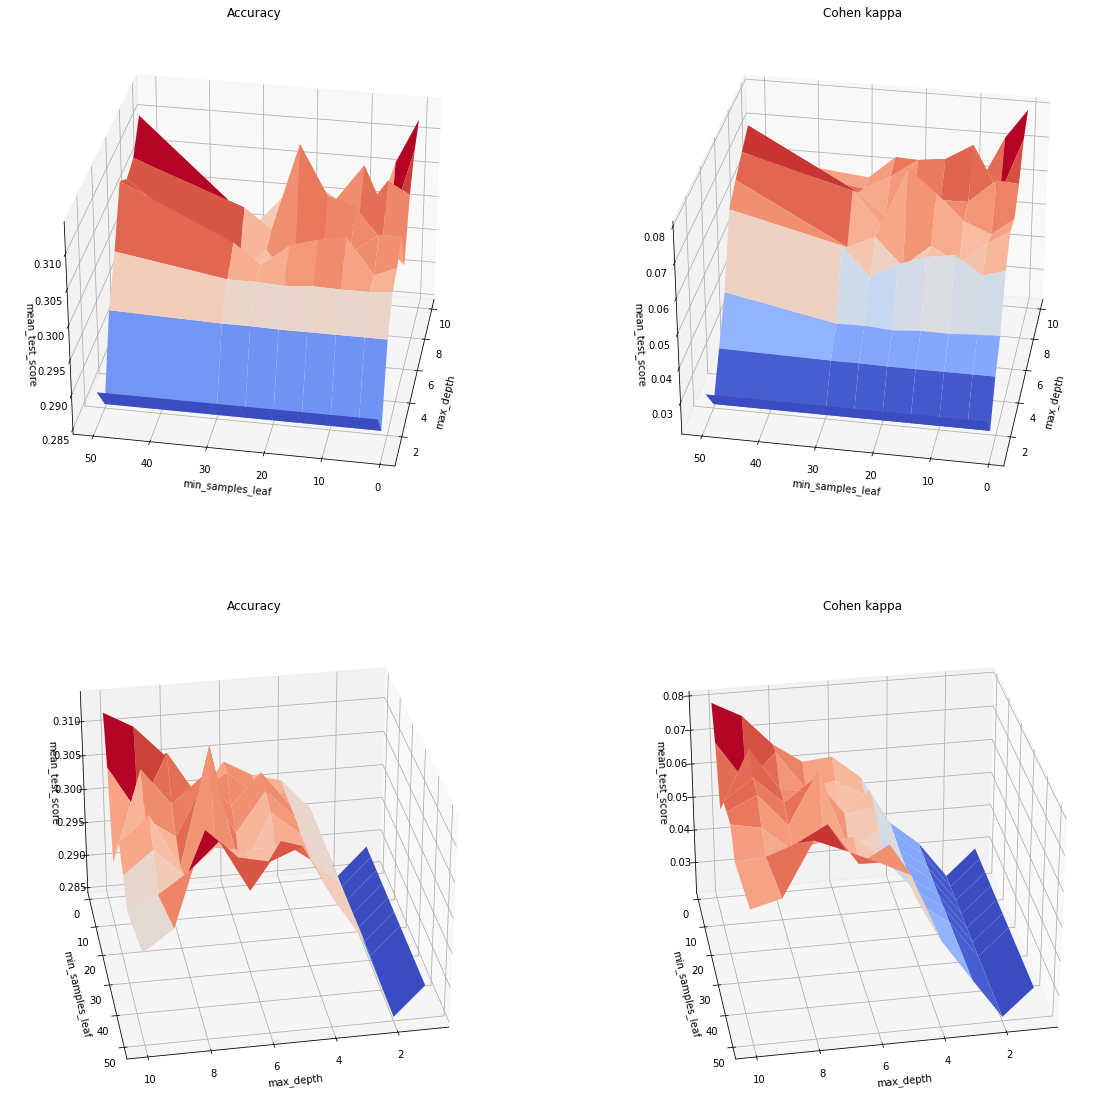

In [52]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
# max_depth
X_d = [1,2,3,4,5,6,7,8,9,10]
# min_samples_leaf
Y_d = [1,5,10,15,20,25,30,50]

X,Y = np.meshgrid(X_d,Y_d)

df = pd.DataFrame(clf_acc.cv_results_)
Z1 = np.zeros((len(Y_d), len(X_d)))
for i in range(len(Y_d)):
  for j in range(len(X_d)):
    Z1[i][j] = df.loc[(df['param_max_depth'] == X[i][j]) & (df['param_min_samples_leaf'] == Y[i][j])& (df['param_max_features'] == 5)& (df['param_min_samples_split'] == 10)].mean_test_score

surf = ax1.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1)
ax1.set_xlabel("max_depth")
ax1.set_ylabel("min_samples_leaf")
ax1.set_zlabel("mean_test_score")
ax1.set_title("Accuracy")
ax1.view_init(30, 190)

surf = ax3.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1)
ax3.set_xlabel("max_depth")
ax3.set_ylabel("min_samples_leaf")
ax3.set_zlabel("mean_test_score")
ax3.set_title("Accuracy")
ax3.view_init(30, 80)


ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

df = pd.DataFrame(clf_kappa.cv_results_)
Z2 = np.zeros((len(Y_d), len(X_d)))
for i in range(len(Y_d)):
  for j in range(len(X_d)):
    Z2[i][j] = df.loc[(df['param_max_depth'] == X[i][j]) & (df['param_min_samples_leaf'] == Y[i][j])& (df['param_max_features'] == 5)& (df['param_min_samples_split'] == 10)].mean_test_score

surf = ax2.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1)

ax2.set_xlabel("max_depth")
ax2.set_ylabel("min_samples_leaf")
ax2.set_zlabel("mean_test_score")
ax2.set_title("Cohen kappa")
ax2.view_init(30, 190)

surf = ax4.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1)

ax4.set_xlabel("max_depth")
ax4.set_ylabel("min_samples_leaf")
ax4.set_zlabel("mean_test_score")
ax4.set_title("Cohen kappa")
ax4.view_init(30, 80)
plt.show()



We can read from the plot that the accuracy score is high around best value the cohen kappa score. Thus the cohen kappa's optimal hyperparameterset will be choosed as optimal.

# Defining function to get optimal solution for further evaluation. 

In [50]:
def get_optimal_decision_tree_solution(data, label):
  # 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10
  clf = tree.DecisionTreeClassifier(max_features=5, max_depth=10, min_samples_leaf=1, min_samples_split=10, random_state=9)
  clf.fit(data,label)
  return clf

In [51]:
# Example
clf = get_optimal_decision_tree_solution(train_data, train_label)
clf.score(test_data,test_label)

0.2887354337505395

# Further improvement ideas:


*   Considering other classification method.
*   Analyzing the confusion matrix and weighing features.

